In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/dataset/'

/content/gdrive/MyDrive/dataset


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
eco_place = pd.read_csv('eco_place.csv')
eco_rating = pd.read_csv('eco_rating.csv')

In [ ]:
eco_place=eco_place.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'], axis = 1)

KeyError: ignored

In [ ]:
eco_place = eco_place.dropna()

In [ ]:
eco_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              182 non-null    int64  
 1   place_name            182 non-null    object 
 2   place_description     182 non-null    object 
 3   category              182 non-null    object 
 4   city                  182 non-null    object 
 5   price                 182 non-null    object 
 6   rating                182 non-null    float64
 7   description_location  182 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 11.5+ KB


In [ ]:
eco_place.head()

,place_id,place_name,place_description,category,city,price,rating,description_location
0,1,Taman Nasional Gunung Leuser,Taman Nasional Gunung Leuser adalah salah satu...,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,"Barisan mountain range, Aceh 24653"
1,2,Desa Wisata Munduk,Desa Wisata Munduk adalah sebuah desa di pegun...,Desa Wisata,Bali,"Rp10,000",4.5,"Munduk, Banjar, Kabupaten Buleleng, Bali"
2,3,Desa Wisata Penglipuran,Desa Wisata Penglipuran adalah sebuah desa wis...,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ..."
3,4,Taman Nasional Bali Barat,Taman Nasional Bali Barat adalah kawasan konse...,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,"Sumber Klampok, Bali"
4,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,"Rp12,000",4.2,"Sugihmukti, Kec. Pasirjambu, Kabupaten Bandung..."


In [ ]:
eco_place.isnull().sum()

place_id                0
place_name              0
place_description       0
category                0
city                    0
price                   0
rating                  0
description_location    0
dtype: int64

In [ ]:
print(f'Jumlah data eco_place yang duplikat: {eco_place.duplicated().sum()}')
print('Jumlah places: ', len(eco_place.place_id.unique()))
print('Jumlah ratings: ', len(eco_rating.user_rating))

Jumlah data eco_place yang duplikat: 0
Jumlah places:  182
Jumlah ratings:  849


In [ ]:
eco_place.describe()

,place_id,rating
count,182.000000,182.000000
mean,91.500000,4.424725
std,52.683014,0.224700
min,1.000000,3.400000
25%,46.250000,4.300000
50%,91.500000,4.400000
75%,136.750000,4.600000
max,182.000000,5.000000


In [ ]:
eco_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      849 non-null    int64  
 1   place_id     849 non-null    int64  
 2   user_rating  849 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 20.0 KB


In [ ]:
eco_rating.head()

,user_id,place_id,user_rating
0,1,28,2.1
1,1,86,3.5
2,1,94,3.9
3,1,146,3.4
4,2,17,2.3


In [ ]:
eco_rating.describe()

,user_id,place_id,user_rating
count,849.000000,849.000000,849.000000
mean,77.792697,89.064782,3.509541
std,44.226709,53.242054,0.853539
min,1.000000,2.000000,2.000000
25%,41.000000,43.000000,2.800000
50%,77.000000,87.000000,3.500000
75%,115.000000,134.000000,4.200000
max,156.000000,183.000000,5.000000


#MODEL DEVELOPMENT DENGAN CONTENT-BASED 

## TF-IDV Vectorizer

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv =  TfidfVectorizer()
tv.fit(eco_place['category'])
tv.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'desa', 'hiburan', 'nasional',
       'taman', 'wisata'], dtype=object)

In [ ]:
matrix_tfidfv = tv.fit_transform(eco_place['category'])
matrix_tfidfv.shape

(182, 9)

In [ ]:
matrix_tfidfv.todense()

matrix([[0.        , 0.        , 0.54344707, ..., 0.66397607, 0.51361568,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678],
        [0.        , 0.        , 0.40916936, ..., 0.        , 0.        ,
         0.64520556],
        ...,
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.4336426 , 0.        , 0.78987859, ..., 0.        , 0.        ,
         0.        ],
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
pd.DataFrame(
   matrix_tfidfv.todense(),
    columns=tv.get_feature_names_out(),
    index=eco_place.place_name
).sample(50, axis=0)

,alam,bahari,budaya,cagar,desa,hiburan,nasional,taman,wisata
place_name,,,,,,,,,
Taman Nasional Gunung Rinjani,0.317559,0.000000,0.000000,0.317559,0.000000,0.000000,0.706720,0.546680,0.000000
Taman Nasional Way Kambas,0.317559,0.000000,0.000000,0.317559,0.000000,0.000000,0.706720,0.546680,0.000000
Desa Wisata Nglinggo,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107
Gunung Lalakon,0.317559,0.000000,0.000000,0.317559,0.000000,0.000000,0.706720,0.546680,0.000000
Desa Wisata Cinangneng,0.000000,0.000000,0.409169,0.000000,0.645206,0.000000,0.000000,0.000000,0.645206
Taman Wisata Alam Cibodas,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000
Pantai Wediombo,0.385178,0.838615,0.000000,0.385178,0.000000,0.000000,0.000000,0.000000,0.000000
Taman Nasional Bali Barat,0.317559,0.000000,0.000000,0.317559,0.000000,0.000000,0.706720,0.546680,0.000000
Ledok Sambi,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000


## COSINE SIMILARITY

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sml = cosine_similarity(matrix_tfidfv)
cosine_sml

array([[1.        , 0.        , 0.22236189, ..., 0.        , 0.4292572 ,
        0.        ],
       [0.        , 1.        , 0.91245846, ..., 0.        , 0.        ,
        0.        ],
       [0.22236189, 0.91245846, 1.        , ..., 0.        , 0.32319412,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.61326325,
        1.        ],
       [0.4292572 , 0.        , 0.32319412, ..., 0.61326325, 1.        ,
        0.61326325],
       [0.        , 0.        , 0.        , ..., 1.        , 0.61326325,
        1.        ]])

In [ ]:
cosine_sml_df = pd.DataFrame(
    cosine_sml, index=eco_place.place_name, columns=eco_place.place_name)
print('Shape:', cosine_sml_df.shape)

cosine_sml_df.sample(15, axis=0)

Shape: (182, 182)


place_name,Taman Nasional Gunung Leuser,Desa Wisata Munduk,Desa Wisata Penglipuran,Taman Nasional Bali Barat,Bukit Jamur,Bukit Moko,Curug Bugbrug,Curug Cilengkrang,Curug Cimahi,Curug Cipanas,...,Puncak Gunung Api Purba - Nglanggeran,Puncak Kebun Buah Mangunan,Puncak Pinus Becici,Seribu Batu Songgo Langit,Sindu Kusuma Edupark (SKE),Studio Alam Gamplong,Watu Goyang,Watu Lumbung,Wisata Alam Kalibiru,Wisata Kaliurang
place_name,,,,,,,,,,,,,,,,,,,,,
Kebun Tanaman Obat Sari Alam,0.000000,0.000000,0.000000,0.449096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.446559,0.446559,0.613263,0.446559,0.000000,0.613263,1.000000,0.613263,1.000000
Jendela Alam,0.312038,0.000000,0.000000,0.332126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.894754,0.894754,0.000000,0.894754,1.000000,0.000000,0.000000,0.000000,0.000000
Candi Gedong Songo,0.543447,0.000000,0.409169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.789879,0.000000,0.000000,0.789879,0.000000,0.789879,0.000000
Kebun Raya Bogor,0.000000,0.000000,0.000000,0.449096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.446559,0.446559,0.613263,0.446559,0.000000,0.613263,1.000000,0.613263,1.000000
Pantai Kesirat,0.000000,0.000000,0.000000,0.244633,0.544725,0.544725,0.544725,0.544725,0.544725,0.544725,...,0.544725,0.243252,0.243252,0.334060,0.243252,0.000000,0.334060,0.544725,0.334060,0.544725
Pantai Jungwok,0.000000,0.000000,0.000000,0.244633,0.544725,0.544725,0.544725,0.544725,0.544725,0.544725,...,0.544725,0.243252,0.243252,0.334060,0.243252,0.000000,0.334060,0.544725,0.334060,0.544725
Desa Wisata Ngadas,0.000000,0.944399,0.861725,0.147663,0.328800,0.328800,0.328800,0.328800,0.328800,0.328800,...,0.328800,0.146829,0.146829,0.201641,0.146829,0.000000,0.201641,0.328800,0.201641,0.328800
Kawah Rengganis Cibuni,0.750029,0.000000,0.000000,1.000000,0.449096,0.449096,0.449096,0.449096,0.449096,0.449096,...,0.449096,0.497719,0.497719,0.275414,0.497719,0.332126,0.275414,0.449096,0.275414,0.449096
Curug Cimahi,0.000000,0.000000,0.000000,0.449096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.446559,0.446559,0.613263,0.446559,0.000000,0.613263,1.000000,0.613263,1.000000


## RECOMMENDATION TESTING

In [ ]:
def place_recommendations(place_name, similarity_data=cosine_sml_df, items=eco_place[['place_name', 'category']], k=50):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
place_name = 'Saung Angklung Mang Udjo'
eco_place[eco_place.place_name.eq(place_name)]

,place_id,place_name,place_description,category,city,price,rating,description_location
27,28,Saung Angklung Mang Udjo,Saung Angklung Mang Udjo adalah tempat wisata ...,Budaya,Bandung,"Rp75,000",4.7,"Jl. Padasuka No.118, Pasirlayung, Kec. Cibeuny..."


In [ ]:
place_recommendations(place_name)

,place_name,category
0,Candi Gedong Songo,Budaya
1,Setu Babakan,Budaya
2,Desa Wisata Sade,Budaya
3,Museum Ullen Sentalu,Budaya
4,Desa Wisata Jodipan,Budaya
5,Stone Garden Citatah,"Budaya,Cagar Alam"
6,Wisata Alam Kalibiru,"Budaya,Cagar Alam"
7,Taman Wisata Alam Kampoeng Air Kragilan,"Budaya,Cagar Alam"
8,Watu Goyang,"Budaya,Cagar Alam"
9,Taman Wisata Alam Riung Gunung,"Budaya,Cagar Alam"


# MODEL DEVELOPMENT DENGAN COLLABORATIVE FILTERING

In [ ]:
user_id = eco_rating['user_id'].unique().tolist()
print('list User_Id: ', user_id)

user_to_num_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded User_Id : ', user_to_user_encoded)

num_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('encoded num to User_Id: ', user_encoded_to_user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38,

In [ ]:
places_id = eco_rating['place_id'].unique().tolist()
print('list places_id: ', places_id)

place_to_num_encoded = {x: i for i, x in enumerate(places_id)}
print('encoded places_id : ', place_to_num_encoded)

num_encoded_to_place = {i: x for i, x in enumerate(places_id)}
print('encoded num to places_id: ', num_encoded_to_place)

list places_id:  [28, 86, 94, 146, 17, 62, 64, 103, 137, 178, 63, 73, 92, 106, 132, 147, 5, 34, 78, 124, 53, 60, 72, 104, 109, 110, 42, 61, 81, 91, 32, 57, 67, 68, 9, 145, 154, 170, 41, 74, 160, 46, 50, 71, 87, 162, 15, 18, 21, 56, 77, 134, 47, 128, 143, 156, 174, 14, 35, 54, 164, 173, 20, 48, 125, 130, 176, 3, 58, 114, 172, 11, 153, 117, 25, 107, 127, 29, 161, 181, 97, 100, 175, 90, 93, 101, 10, 98, 144, 102, 19, 89, 23, 38, 150, 133, 83, 149, 120, 37, 96, 119, 152, 8, 16, 116, 121, 43, 75, 105, 111, 168, 26, 55, 122, 179, 148, 7, 113, 167, 59, 24, 131, 163, 6, 2, 84, 159, 12, 39, 49, 141, 30, 151, 40, 135, 76, 177, 112, 82, 108, 126, 13, 27, 22, 65, 180, 51, 4, 182, 44, 79, 166, 80, 66, 52, 155, 171, 33, 45, 95, 118, 69, 142, 165, 70, 138, 88, 129, 139, 31, 115, 183, 99, 123, 136, 158, 85, 36, 157, 140, 169]
encoded places_id :  {28: 0, 86: 1, 94: 2, 146: 3, 17: 4, 62: 5, 64: 6, 103: 7, 137: 8, 178: 9, 63: 10, 73: 11, 92: 12, 106: 13, 132: 14, 147: 15, 5: 16, 34: 17, 78: 18, 124: 19,

In [ ]:
eco_rating['user'] = eco_rating['user_id'].map(user_to_num_encoded)
eco_rating['place'] = eco_rating['place_id'].map(place_to_num_encoded)

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
num_users = len(user_to_num_encoded)
num_places = len(num_encoded_to_place)

eco_rating['rating'] = eco_rating['user_rating'].values.astype(np.float32)

min_rating = min(eco_rating['rating'])
max_rating = max(eco_rating['rating'])

print(f'Number of users {num_users}')
print(f'Number of places: {num_places}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Number of users 156
Number of places: 182
Min rating: 2.0
Max rating: 5.0


## SPLIT TRAINING DAN VALIDATION DATA

In [ ]:
eco_rating = eco_rating.sample(frac=1, random_state=42)
eco_rating

,user_id,place_id,user_rating,user,place,rating
512,93,39,4.5,92,129,4.5
357,66,79,3.0,65,151,3.0
110,22,10,3.9,21,86,3.9
684,125,76,2.8,124,136,2.8
39,7,104,3.9,6,23,3.9
...,...,...,...,...,...,...
71,13,54,3.1,12,59,3.1
106,21,90,2.3,20,83,2.3
270,50,162,2.3,49,45,2.3
435,79,75,4.6,78,108,4.6


In [ ]:
x = eco_rating[['user', 'place']].values
y = eco_rating['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_data = int(0.8 * eco_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_data],
    x[train_data:],
    y[:train_data],
    y[train_data:]
)

print(x, y)

[[ 92 129]
 [ 65 151]
 [ 21  86]
 ...
 [ 49  45]
 [ 78 108]
 [ 19  80]] [0.83333333 0.33333333 0.63333337 0.26666665 0.63333337 0.43333332
 0.5        0.19999997 0.09999998 0.5333333  0.36666663 0.4666667
 0.09999998 0.83333333 0.30000003 0.56666668 0.0333333  0.19999997
 0.40000002 0.5        0.86666663 0.43333332 0.73333327 0.23333335
 0.19999997 0.69999997 0.26666665 0.9333334  0.09999998 0.43333332
 0.16666667 0.30000003 0.40000002 0.19999997 0.9666667  0.73333327
 0.59999998 0.33333333 0.36666663 0.06666668 0.56666668 0.5333333
 0.4666667  0.33333333 0.63333337 0.13333337 0.0333333  0.5
 0.30000003 0.16666667 0.80000003 0.16666667 0.5333333  0.59999998
 0.69999997 0.19999997 0.76666673 0.33333333 0.59999998 0.5333333
 0.43333332 0.69999997 0.26666665 0.73333327 0.73333327 0.43333332
 0.9333334  0.9333334  0.23333335 0.86666663 0.16666667 0.76666673
 0.80000003 0.06666668 0.63333337 0.0333333  0.66666667 0.5
 0.5333333  0.19999997 0.86666663 0.69999997 0.19999997 0.56666668
 0.2666

## MODEL DEVELOPMENT

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(num_places, 1)
    
  def call(self, inputs):
    vector_users = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    vector_places = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])
    
    dot_user_place = tf.tensordot(vector_users, vector_places, 2) 
    
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_users, num_places, 16)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
from keras.callbacks import EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=5,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/50
136/136 [==============================] - 3s 7ms/step - loss: 0.6952 - root_mean_squared_error: 0.2843 - val_loss: 0.6952 - val_root_mean_squared_error: 0.2934
Epoch 2/50
136/136 [==============================] - 1s 5ms/step - loss: 0.6958 - root_mean_squared_error: 0.2848 - val_loss: 0.6952 - val_root_mean_squared_error: 0.2934
Epoch 3/50
136/136 [==============================] - 1s 5ms/step - loss: 0.6932 - root_mean_squared_error: 0.2825 - val_loss: 0.6953 - val_root_mean_squared_error: 0.2935
Epoch 4/50
136/136 [==============================] - 0s 3ms/step - loss: 0.6917 - root_mean_squared_error: 0.2812 - val_loss: 0.6953 - val_root_mean_squared_error: 0.2936
Epoch 5/50
136/136 [==============================] - 0s 3ms/step - loss: 0.6929 - root_mean_squared_error: 0.2823 - val_loss: 0.6954 - val_root_mean_squared_error: 0.2936
Epoch 6/50
136/136 [==============================] - 0s 3ms/step - loss: 0.6920 - root_mean_squared_error: 0.2815 - val_loss: 0.6954 - val_

In [ ]:
model.evaluate(x_val, y_val)

6/6 [==============================] - 1s 4ms/step - loss: 0.7188 - root_mean_squared_error: 0.3124


[0.718765139579773, 0.31237101554870605]

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


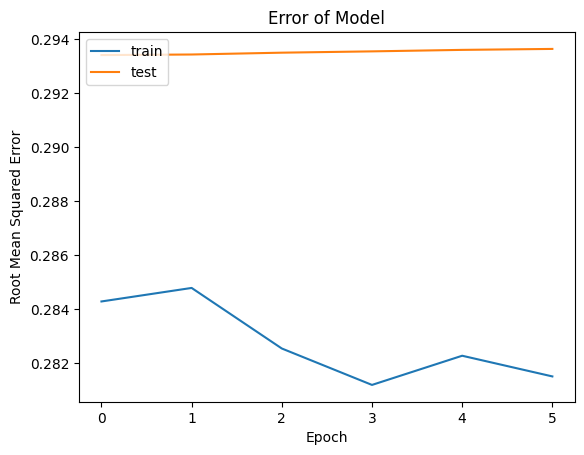

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Error of Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

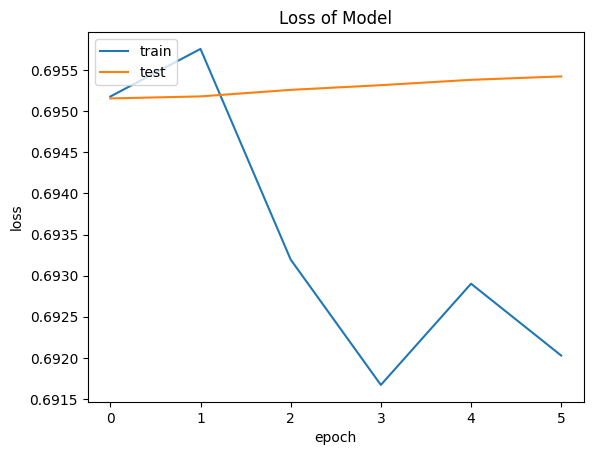

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### TES REKOMENDASI

In [ ]:
df_places = eco_place
df_ratings = eco_rating

In [ ]:
user_id = df_ratings.user_id.sample(1).iloc[0]
place_rated = df_ratings[df_ratings.user_id == user_id]

place_not_rated = df_places[~df_places['place_id'].isin(
    place_rated.place_id.values)]['place_id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_num_encoded.keys()))
)

place_not_rated = [
    [place_to_num_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_num_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)

In [ ]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    num_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Recommendations for user: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .place_id.values
)

rows_df_places = df_places[df_places['place_id'].isin(top_place_user)]
for row in rows_df_places.itertuples():
    print(row.place_name + ':', row.category)

print('-----' * 8)
print('Top 10 recommended places')
print('-----' * 8)

recommended_places = df_places[df_places['place_id'].isin(recommended_place_ids)]
for row in recommended_places.itertuples():
    print(row.place_name + ':', row.category)

6/6 [==============================] - 0s 4ms/step
Recommendations for user: 62
Place with high ratings from user
----------------------------------------
Taman Wisata Alam Gunung Geulis: Budaya,Cagar Alam
Taman Nasional Berbak: Cagar Alam,Taman Nasional
Hutan Mangrove Kulon Progo: Cagar Alam
Taman Nasional Komodo: Bahari,Taman Hiburan,Taman Nasional
Pantai Samas : Bahari,Cagar Alam
----------------------------------------
Top 10 recommended places
----------------------------------------
Desa Wisata Jodipan: Budaya
Taman Wisata Alam Puncak Banyu Biru: Budaya,Cagar Alam
Taman Wisata Alam Hutan Albasia: Budaya,Cagar Alam
Taman Nasional Kutai: Cagar Alam,Taman Nasional
Pantai Watu Kodok: Bahari,Cagar Alam
Pantai Wediombo: Bahari,Cagar Alam
Puncak Gunung Api Purba - Nglanggeran: Cagar Alam
Puncak Pinus Becici: Cagar Alam,Taman Hiburan
Sindu Kusuma Edupark (SKE): Cagar Alam,Taman Hiburan
Watu Lumbung: Cagar Alam
